## mount to google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/AICamp2023/MMDetection

Mounted at /content/drive
/content/drive/MyDrive/AICamp2023/MMDetection


## installaltion

In [2]:
!pip install -U openmim
!mim install mmengine
!mim install 'mmcv>=2.0.0rc3'
!mim install "mmdet>=3.0.0rc6"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 3.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.3/374.3 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 10.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 15.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━

## GPU information

In [3]:
import os
import mmcv
import mmengine
import torch

if torch.cuda.is_available():
    print('CUDA is available')
    device_count = torch.cuda.device_count()
    print(f'Total number of CUDA devices: {device_count}')
    for i in range(device_count):
        device_name = torch.cuda.get_device_name(i)
        print(f'Device {i}: {device_name}')
else:
    print('CUDA is not available')

CUDA is available
Total number of CUDA devices: 1
Device 0: Tesla T4


## fetch configs

In [ ]:
!mim search mmdet --model RTMdet

--------------------------------------------------------------------------------
config id: rtmdet_tiny_8xb32-300e_coco
architecture                                            cspnext,cspnextpafpn
coco/box_ap                                             40.9
config                                                  configs/rtmdet/rtmdet...
epochs                                                  300
model                                                   rtmdet
readme                                                  configs/rtmdet/README.md
training_data                                           coco
training_memory(GB)                                     11.7
training_resources                                      8x a100 gpus
training_techniques                                     adamw,flat cosine ann...
weight                                                  https://download.open...
--------------------------------------------------------------------------------
config id: rtmdet_s_8xb

In [ ]:
!mim download mmdet --config rtmdet_tiny_8xb32-300e_coco --dest Configs

processing rtmdet_tiny_8xb32-300e_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 MiB 17.1 MB/s eta 0:00:00
Successfully downloaded rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth to /content/drive/MyDrive/AICamp2023/MMDetection/Configs
Successfully dumped rtmdet_tiny_8xb32-300e_coco.py to /content/drive/MyDrive/AICamp2023/MMDetection/Configs


## training

In [ ]:
!mim train mmdet Configs//rtmdet_drinks.py

Streaming output truncated to the last 5000 lines.
    batch_size=32,
    num_workers=10,
    persistent_workers=True,
    drop_last=False,
    sampler=dict(type='DefaultSampler', shuffle=False),
    dataset=dict(
        type='CocoDataset',
        data_root='Drink_284_Detection_coco/',
        ann_file='val_coco.json',
        data_prefix=dict(img='images/'),
        test_mode=True,
        pipeline=[
            dict(type='LoadImageFromFile', backend_args=None),
            dict(type='Resize', scale=(640, 640), keep_ratio=True),
            dict(
                type='Pad', size=(640, 640),
                pad_val=dict(img=(114, 114, 114))),
            dict(
                type='PackDetInputs',
                meta_keys=('img_id', 'img_path', 'ori_shape', 'img_shape',
                           'scale_factor'))
        ],
        backend_args=None,
        metainfo=dict(
            classes=('cola', 'pepsi', 'sprite', 'fanta', 'spring', 'ice',
                     'scream', 'milk'

## testing

In [ ]:
!mim test mmdet Configs//rtmdet_drinks.py --checkpoint \
        Models//RTMdet//best_coco_bbox_mAP_epoch_100.pth --gpus 1 

Testing command is /usr/bin/python3 /usr/local/lib/python3.10/dist-packages/mmdet/.mim/tools/test.py Configs//rtmdet_drinks.py Models//RTMdet//best_coco_bbox_mAP_epoch_100.pth --launcher none. 
06/10 20:55:57 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 1124038800
    GPU 0: NVIDIA A100-SXM4-40GB
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - L

## inference

In [15]:
import cv2
from mmdet.utils import register_all_modules
from mmdet.apis import init_detector
from mmdet.apis import inference_detector

register_all_modules(init_default_scope=False)
model = init_detector('Configs//rtmdet_drinks.py', 'Models//RTMdet//best_coco_bbox_mAP_epoch_100.pth', device='cuda')

images_dir = os.listdir('Test')
images_dir = [os.path.join('Test', image) for image in images_dir]
images = [cv2.cvtColor(cv2.imread(image_dir), cv2.COLOR_RGB2BGR) for image_dir in images_dir]
predictions = [inference_detector(model, image) for image in images]

Loads checkpoint by local backend from path: Models//RTMdet//best_coco_bbox_mAP_epoch_100.pth


/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmdet.visualization.local_visualizer.DetLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(


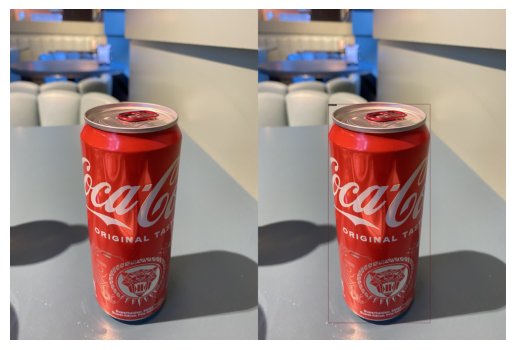

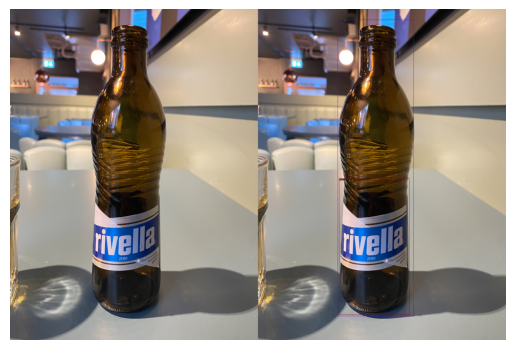

In [46]:
from matplotlib import pyplot as plt
from mmdet.registry import VISUALIZERS

visualizer = VISUALIZERS.build(model.cfg.visualizer)
visualizer.dataset_meta = model.dataset_meta

os.makedirs('Results', exist_ok=True)
for idx, image in enumerate(images):
    visualizer.add_datasample('result', image, data_sample=predictions[idx], pred_score_thr=0.5)
    result = visualizer.get_image()
    plt.imshow(result); plt.axis('off')
    plt.savefig('Results//result_n.jpg'.replace('n', str(idx)))
    plt.show()

## feature map visualization

In [48]:
!rm -rf mmyolo
!git clone -b tutorials https://github.com/open-mmlab/mmyolo.git
%cd mmyolo
!pip install -e .
%cd ..

Cloning into 'mmyolo'...
remote: Enumerating objects: 4898, done.
remote: Counting objects: 100% (289/289), done.
remote: Compressing objects: 100% (172/172), done.
remote: Total 4898 (delta 122), reused 230 (delta 112), pack-reused 4609
Receiving objects: 100% (4898/4898), 3.75 MiB | 15.32 MiB/s, done.
Resolving deltas: 100% (3011/3011), done.
Updating files: 100% (650/650), done.
/content/drive/MyDrive/AICamp2023/MMDetection/mmyolo
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/drive/MyDrive/AICamp2023/MMDetection/mmyolo
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmyolo
/content/drive/MyDrive/AICamp2023/MMDetection


Loads checkpoint by local backend from path: Models//RTMdet//best_coco_bbox_mAP_epoch_100.pth
RTMDet(
  (data_preprocessor): DetDataPreprocessor()
  (backbone): CSPNeXt(
    (stem): Sequential(
      (0): ConvModule(
        (conv): Conv2d(3, 12, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): _BatchNormXd(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activate): SiLU(inplace=True)
      )
      (1): ConvModule(
        (conv): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): _BatchNormXd(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activate): SiLU(inplace=True)
      )
      (2): ConvModule(
        (conv): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): _BatchNormXd(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activate): SiLU(inplace=True)
      )
    )
    (stage1): Sequential

Text(0.5, 1.0, 'backbone feature map')

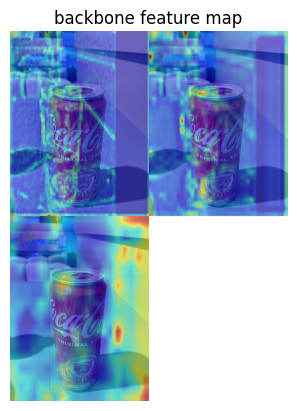

In [61]:
from PIL import Image

!python mmyolo/demo/featmap_vis_demo.py \
      Test/IMG_9850.jpg \
      Configs//rtmdet_drinks.py \
      Models//RTMdet//best_coco_bbox_mAP_epoch_100.pth  \
      --preview-model\
      --target-layers backbone  \
      --channel-reduction squeeze_mean \
      --out-dir Feature_map/backbone
plt.imshow(cv2.cvtColor(cv2.imread('Feature_map//backbone//IMG_9850.jpg'), cv2.COLOR_RGB2BGR))
plt.axis('off'); plt.title('backbone feature map')

Loads checkpoint by local backend from path: Models//RTMdet//best_coco_bbox_mAP_epoch_100.pth
06/10 22:04:18 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
[                                                  ] 0/1, elapsed: 0s, ETA:/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:984: UserWarning: Since the spatial dimensions of overlaid_image: (4032, 3024) and featmap: torch.Size([80, 80]) are not same, the feature map will be interpolated. This may cause mismatch problems ！
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:984: UserWarning: Since the spatial dimensio

Text(0.5, 1.0, 'neck feature map')

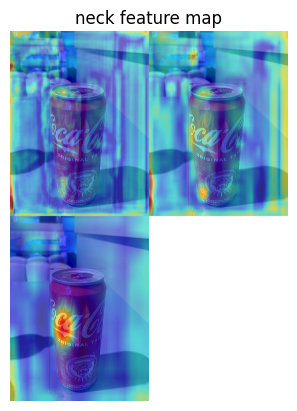

In [56]:
!python mmyolo/demo/featmap_vis_demo.py \
      Test/IMG_9850.jpg \
      Configs//rtmdet_drinks.py \
      Models//RTMdet//best_coco_bbox_mAP_epoch_100.pth  \
      --target-layers neck  \
      --channel-reduction squeeze_mean \
      --out-dir Feature_map/neck
plt.imshow(cv2.cvtColor(cv2.imread('Feature_map//neck//IMG_9850.jpg'), cv2.COLOR_RGB2BGR))
plt.axis('off'); plt.title('neck feature map')

## Grad box AM visualization

In [57]:
!pip install grad-cam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 84.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.6-py3-none-any.whl size=38241 sha256=c326c0ef8ed9f95aec625f2fcf16ff00cf43bc0581d0443b229d024380d063bc
  Stored in directory: /root/.cache/pip/wheels/3c/6c/04/9a543775e9f25f6c441180a552456f1696167439459730ff87
Successfully built grad-cam


The algorithm currently used is rtmdet
Loads checkpoint by local backend from path: Models//RTMdet//best_coco_bbox_mAP_epoch_100.pth
[                                                  ] 0/1, elapsed: 0s, ETA:/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
[>>] 1/1, 0.5 task/s, elapsed: 2s, ETA:     0sAll done!
Results have been saved at /content/drive/MyDrive/AICamp2023/MMDetection/Grad_CAM/backbone


Text(0.5, 1.0, 'backbone.stage4 grad CAM map')

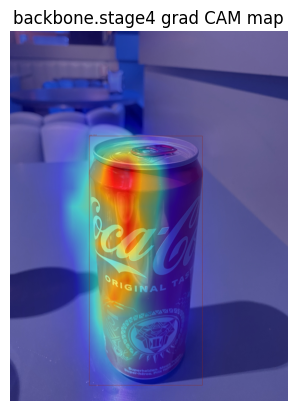

In [66]:
!python mmyolo/demo/boxam_vis_demo.py \
      Test/IMG_9850.jpg \
      Configs//rtmdet_drinks.py \
      Models//RTMdet//best_coco_bbox_mAP_epoch_100.pth  \
      --target-layers backbone.stage4  \
      --out-dir Grad_CAM/backbone
plt.imshow(cv2.cvtColor(cv2.imread('Grad_CAM//backbone//IMG_9850.jpg'), cv2.COLOR_RGB2BGR))
plt.axis('off'); plt.title('backbone.stage4 grad CAM map')

The algorithm currently used is rtmdet
Loads checkpoint by local backend from path: Models//RTMdet//best_coco_bbox_mAP_epoch_100.pth
[                                                  ] 0/1, elapsed: 0s, ETA:/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
[>>] 1/1, 0.6 task/s, elapsed: 2s, ETA:     0sAll done!
Results have been saved at /content/drive/MyDrive/AICamp2023/MMDetection/Grad_CAM/neck_min


Text(0.5, 1.0, 'neck.out_convs[2](min) grad CAM map')

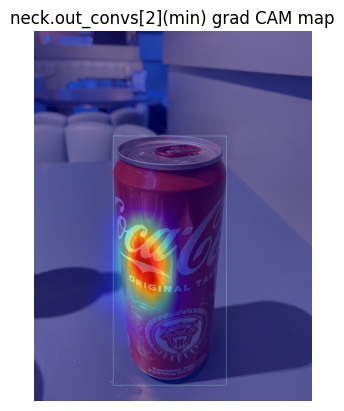

In [69]:
!python mmyolo/demo/boxam_vis_demo.py \
      Test/IMG_9850.jpg \
      Configs//rtmdet_drinks.py \
      Models//RTMdet//best_coco_bbox_mAP_epoch_100.pth  \
      --target-layers neck.out_convs[2]  \
      --out-dir Grad_CAM/neck_min
plt.imshow(cv2.cvtColor(cv2.imread('Grad_CAM//neck_min//IMG_9850.jpg'), cv2.COLOR_RGB2BGR))
plt.axis('off'); plt.title('neck.out_convs[2](min) grad CAM map')

The algorithm currently used is rtmdet
Loads checkpoint by local backend from path: Models//RTMdet//best_coco_bbox_mAP_epoch_100.pth
[                                                  ] 0/1, elapsed: 0s, ETA:/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
[>>] 1/1, 0.6 task/s, elapsed: 2s, ETA:     0sAll done!
Results have been saved at /content/drive/MyDrive/AICamp2023/MMDetection/Grad_CAM/neck_max


Text(0.5, 1.0, 'neck.out_convs[0](max) grad CAM map')

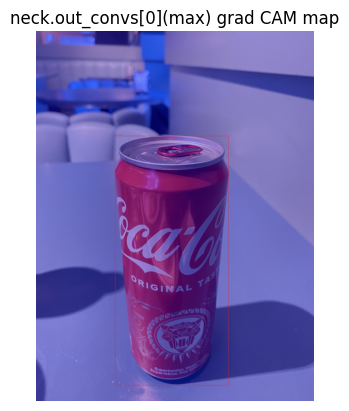

In [70]:
!python mmyolo/demo/boxam_vis_demo.py \
      Test/IMG_9850.jpg \
      Configs//rtmdet_drinks.py \
      Models//RTMdet//best_coco_bbox_mAP_epoch_100.pth  \
      --target-layers neck.out_convs[0]  \
      --out-dir Grad_CAM/neck_max
plt.imshow(cv2.cvtColor(cv2.imread('Grad_CAM//neck_max//IMG_9850.jpg'), cv2.COLOR_RGB2BGR))
plt.axis('off'); plt.title('neck.out_convs[0](max) grad CAM map')